### The concept of hyperparameter
Hyperparameter tuning is one of the most important parts of a machine learning pipeline. A wrong choice of the hyperparameters’ values may lead to wrong results and a model with poor performance.<br>

Hyperparameters are model parameters whose values are set **before** training.<br> These hyperparameters might address model design questions such as:

- What **degree of polynomial features** should I use for my linear model?
- What should be the **maximum depth** allowed for my decision tree?
- What should be the **minimum number of samples** required at a leaf node in my decision tree?
- **How many trees** should I include in my random forest?
- **How many neurons** should I have in my neural network layer?
- **How many layers** should I have in my neural network?
- What should I set my **learning rate** to for gradient descent?

Let's make it simple. For example, **the number of neurons** of a feed-forward neural network is a hyperparameter, because we set it before training. Another example of hyperparameter is **the number of trees** in a random forest or the penalty intensity of a Lasso regression. As you can see, the hyperparameters are all numbers that are set before the training phase and their values affect the behavior of the model.

### IMPORTANT!
Hyperparameters are **not** model parameters and they cannot be directly trained from the data. Model parameters are **learned** during training when we optimize a loss function using something like gradient descent.


### The reason for tuning the hyperparameters
Why should we tune the hyperparameters of a model?<br>

That is because we don’t really know the models' optimal values in advance. A model with different hyperparameters is, actually, a different model so it may have a lower performance.<br>

In the case of neural networks, a low number of neurons could lead to underfitting and a high number could lead to overfitting.<br>

In both cases, the model is not good, so we need to find the intermediate number of neurons that leads to the best performance.<br>

If the model has several hyperparameters, we need to find the best combination of values of the hyperparameters searching in a multi-dimensional space. That’s why hyperparameter tuning, which is the process of finding the right values of the hyperparameters, is a very complex and time-expensive task.

### Hyperparameter tuning in practice
Tuning hyperparameters means making decisions on the **stopping criteria**. There are several stopping criteria, but we're going to deal with four first, such as:
1. The max_depth
2. The minimum size of the node: min_samples_split
3. The minimum lift: min_impurity_decrease
4. The cost-complexity<br>
---
The **max depth** means the maximum number of depth in the decision tree. The tree structure cannot be deeper than this value we set using **`max_depth`**. The smaller it is, the smaller the tree will be.<br>

The **minimum size of the node** is the number of data(samples) to split. The smaller the value, the larger the tree will be, and its default value is 2.<br>

We can set this using **`min_samples_split`** A node will be split if this split induces a decrease of the impurity greater than or equal to this value. The equation for min_sample_split is:<br>

$$\frac{N_t}{N} \times (impurity - \frac{N_{tR}}{N_t} \times right\;impurity - \frac{N_{tl}}{N_t} \times left\;impurity)$$

Where<br>
$N$ is the total number of samples<br>
$N_t$ is the total number of samples in current node<br>
$N_{tL}$ is the number of samples in the left child<br>
$N_{tR}$ is the number of samples in the right child<br>
$N$, $N_t$, $N_{tL}$, $N_{tR}$ are all refer to the weighted sum, if `sample_weight` is passed.<br>

The **minimum lift** is a criterion to see if the association rules between the items are coincidental or not. We can set the minimum lift using **`min_impurity_decrease`**.<br>

When the lift is the same or smaller than the value set, the tree will not split more. The smaller the value, the larger the tree will be.<br>

For pruning, we can think of two types of it. The first is **pre-pruning**, and the other is **post-pruning**. Pre-pruning is also called **early stopping**. It means literally stopping the training early. And we can do it by setting the max depth or the number of branches. Post-pruning is the process of performing pruning after we train the model. We can do post-pruning using the cost-complexity pruning technique.<br>

The **cost complexity** is a concept that is used in **cost complexity pruning**. Pruning is a technique to prevent overfitting by limiting the model by setting penalty coefficients for the impurity and for the decision tree being larger.<br>

In practice, we can do cost complexity pruning by finding the **$\alpha$** value with the least influence and prune the node with that value. The equation for cost complexity pruning is:

$$R_\alpha (T) = R(T) + \alpha |T|$$

where<br>
$R(T)$ is the learning errors of the leaf nodes<br>
$|T|$ is the number of leaf nodes<br>
$\alpha$ is the complexity parameter

When we focus on reducing the  𝑅(𝑇)  value only, the size of the tree gets bigger. It means the tree structure has more branches.  𝛼 decides the number of leaf nodes to be remained, thus we need to modify it to prevent overfitting. The bigger the  𝛼  value, the more nodes being pruned will be.<br>

Note that we need to calculate the $R_\alpha (T_t)$ for the sub-trees. The equation is very similar to above one.

$$R_\alpha (T_t) = R(T_t) + \alpha |T_t|$$

---
Using the stopping criteria such as above, we can set the optimal conditions for model training, and this process is called hyperparameter tuning.

### GridSearch

Amongst the hyperparameter tuning techniques, GridSearch, a sort of exhaustive search, shows the best performance. GridSearch is a technique that finds the best combination among the possible combinations. However, GridSearch also has cons because the training consumes a lot of time.<br>

For now, we wikk implement an exhaustive search using GreadSearCV module.

In [1]:
# Downloading data
!wget 'https://bit.ly/3gLj0Q6'

# Unzip the downloaded data
import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-09-09 15:26:09--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2022-09-09 15:26:10--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 142.251.42.142, 2404:6800:4004:81d::200e
Connecting to drive.google.com (drive.google.com)|142.251.42.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ibo6ol0ant2ejsram50360eiraf020h2/1662704700000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download&uuid=cafeca96-1204-4b01-a9f7-9928fbbec87c [following]
--2022-09-09 15:26:10--  https://doc-0c-10-docs.googleusercon

In [2]:
# Import pandas and RandomForestRegressor
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# Check if the data loading is successful
print('============ Train Data ============\n')
print('Train Data Information\n', train.info(), '\n')
print('Train Data Shape: ', train.shape, '\n')

print('============ Test Data ============')
print('Test Data Information\n', test.info(), '\n')
print('Test Data Shape: ', test.shape, '\n')

============ Train Data ============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
Train Data Information
 None 

Train Data Shape:  (1459, 11) 

============ Test Data ============
<class 'pandas.

In [5]:
# Check if there are missing values
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64 

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [6]:
# Remove the missing values using linear interpolation
train.interpolate(inplace=True)
test.interpolate(inplace=True)

In [7]:
# Check if the null values are replaced well.
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64 

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


In [8]:
# Declare the model
X_train = train.drop(['count'], axis=1)
Y_train = train['count']

# Train the model
model = RandomForestRegressor(criterion = 'squared_error')
model.fit(X_train, Y_train)

RandomForestRegressor()

In [9]:
# Print the feature importances
model.feature_importances_

array([0.02398086, 0.59643309, 0.17837677, 0.01758   , 0.02619895,
       0.0376788 , 0.03186152, 0.03681893, 0.03085461, 0.02021648])

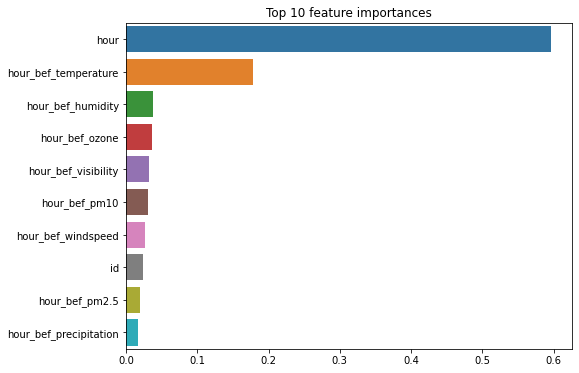

In [10]:
# Visualizing the feature importances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importance_values = model.feature_importances_
importances = pd.Series(importance_values, index = X_train.columns)
importance_top10 = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Top 10 feature importances')
sns.barplot(x = importance_top10, y = importance_top10.index)
plt.show()

In [11]:
# Create train datasets by removing the less important features
X_train1 = train.drop(['count', 'hour_bef_precipitation'], axis=1)
X_train2 = train.drop(['count', 'hour_bef_precipitation', 'hour_bef_pm2.5'], axis=1)
X_train3 = train.drop(['count', 'hour_bef_precipitation', 'hour_bef_pm2.5', 'id'], axis=1)
X_train4 = train.drop(['count', 'hour_bef_precipitation', 'hour_bef_pm2.5', 'id', 'hour_bef_windspeed'], axis=1)

Y_train = train['count']

# Create test datasets
test1 = test.drop(['hour_bef_precipitation'], axis=1)
test2 = test.drop(['hour_bef_precipitation', 'hour_bef_pm2.5'], axis=1)
test3 = test.drop(['hour_bef_precipitation', 'hour_bef_pm2.5', 'id'], axis=1)
test4 = test.drop(['hour_bef_precipitation', 'hour_bef_pm2.5', 'id', 'hour_bef_windspeed'], axis=1)

In [12]:
# Check the shape of training and test data
print('X_train1.shape: ', X_train1.shape, '\n')
print('X_train2.shape: ', X_train2.shape, '\n')
print('X_train3.shape: ', X_train3.shape, '\n')
print('X_train4.shape: ', X_train4.shape, '\n')
print('Y_train.shape: ', Y_train.shape, '\n')
print('test1.shape', test1.shape, '\n')
print('test2.shape', test2.shape, '\n')
print('test3.shape', test3.shape, '\n')
print('test4.shape', test4.shape, '\n')

X_train1.shape:  (1459, 9) 

X_train2.shape:  (1459, 8) 

X_train3.shape:  (1459, 7) 

X_train4.shape:  (1459, 6) 

Y_train.shape:  (1459,) 

test1.shape (715, 9) 

test2.shape (715, 8) 

test3.shape (715, 7) 

test4.shape (715, 6) 



In [13]:
# Declare separate models
model1 = RandomForestRegressor(criterion = 'squared_error')
model2 = RandomForestRegressor(criterion = 'squared_error')
model3 = RandomForestRegressor(criterion = 'squared_error')
model4 = RandomForestRegressor(criterion = 'squared_error')

# Train the saparated models
model1.fit(X_train1, Y_train)
model2.fit(X_train2, Y_train)
model3.fit(X_train3, Y_train)
model4.fit(X_train4, Y_train)

RandomForestRegressor()

### RandomForest Hyperparameters

**n_estimators:** Number of decision making tree
- Default = 10
- When increase it, the performance may get better, but may cause too much train time.<br>

**min_samples_split**: The minimum number of sample used to split node
- Used to control overfitting
- Default = 2: The smaller the value, the greater possibility of overfitting because of the increasing node split<br>

**min_samples_leaf**: The minimum number of samples to be leaf node
- Along to min_samples_split, it is used to control the overfitting
- When the data is imbalanced, some data of a specific class may extremely small, thus it needs to be kept the small value<br>

**max_features**: Maximum number of features for optimal split
- Default = 'auto'
    - Note: The default value of max_feature is none in decision tree
- When specified in int type: The number of features
- When specified in float type: The ratio of features
- 'sqrt' or 'auto': Samples as many as $\sqrt{The\;number\;of\;whole\;features}$
- log : Samples as many as $\log_2{(The\;number\;of\;whole\;features)}$<br>

**max_depth**: Maximum depth of the tree
- Default = none
    - Split until the class value is completely determined
    - Or until the number of data is less than min_samples_split
- As the depth increases, it may overfit, so proper control is required.<br>

**max_leaf_nodes**: The maximum number of leaf nodes

### GridSearchCV initializer
- estimator: classifier, regressor, pipeline, and so on.

- param_grid: In the dictionary type, input the parameters that are going to be used for parameter tuning.

- scoring: Method to evaluate the prediction performance. Usually set to accuracy.

- cv: Specifies the number of divisions in cross-validation(The number of fold).

- refit: The default value is True. When it is set default, it finds the optimal hyperparameter and retrains it.

- n_jobs: The default value is 1, Set -1 to use all cores.

In [14]:
from sklearn.model_selection import GridSearchCV
import time

model = RandomForestRegressor(criterion = 'mse',
                              random_state=2022)

params = {'n_estimators': [200, 300, 500],
          'max_features': [5, 6, 8],
          'min_samples_leaf': [1, 3, 5]}

# Declare GridSearchCV for each model 
greedy_CV1 = GridSearchCV(model1,
                          param_grid=params,
                          cv = 3,
                          n_jobs = -1)

greedy_CV2 = GridSearchCV(model2,
                          param_grid=params,
                          cv = 3,
                          n_jobs = -1)

greedy_CV3 = GridSearchCV(model3,
                          param_grid=params,
                          cv = 3,
                          n_jobs = -1)

greedy_CV4 = GridSearchCV(model4,
                          param_grid=params,
                          cv = 3,
                          n_jobs = -1)

start_time = time.time()

# Train for each dataset
greedy_CV1.fit(X_train1, Y_train)
greedy_CV2.fit(X_train2, Y_train)
greedy_CV3.fit(X_train3, Y_train)
greedy_CV4.fit(X_train4, Y_train)

end_time = time.time()

print("Processing time: ", end_time-start_time, 'seconds.')

/home/raymond/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/home/raymond/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/raymond/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/raymond/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/ray

Processing time:  28.71129870414734 seconds.


In [15]:
# Predict with each trained model
prediction1 = greedy_CV1.predict(test1)
prediction2 = greedy_CV2.predict(test2)
prediction3 = greedy_CV3.predict(test3)
prediction4 = greedy_CV4.predict(test4)

print(prediction1)
print(prediction2)
print(prediction3)
print(prediction4)

[102.87153649 220.93630534  94.74674515  40.16582333  46.89640974
 129.17611169 172.96752756 306.91949059  40.08967793 120.39274619
 307.55572328 253.67508004 109.05305689  42.08068823 213.03201374
 156.13451645  26.19274961 192.47906568 335.60966189 159.77826325
 228.11882918  85.81709269  26.22435233 144.39028535 142.00388172
 116.27053084  26.67613608 120.67401443 115.98845622 151.20036597
  78.62782933  36.78833187  63.58824601 132.50679971 274.55173764
  37.93326922 133.66000758 169.13166349 215.88838517  81.47139861
  59.58768424 123.53177932 163.7918612   86.12102417 327.01138881
 187.81312811  87.12307421  61.93339339  18.6079084   89.04025159
 248.81614503  94.78168483 147.10532389 123.27784601 203.0182515
 149.29850743  50.36643307 183.57377055  25.01972794  18.96481873
  99.64686546  89.90431812 254.01167332 303.56361644 149.68239941
 312.21936204  24.93445471 213.09923207 142.32289196  32.93879334
 105.2914438   32.94174903 148.99882181  15.31479477 319.20233705
 231.612625

In [16]:
# Save the prediction results
GridSearchCV1 = pd.read_csv('data/submission.csv')
GridSearchCV2 = pd.read_csv('data/submission.csv')
GridSearchCV3 = pd.read_csv('data/submission.csv')
GridSearchCV4 = pd.read_csv('data/submission.csv')

import numpy as np
GridSearchCV1['count'] = np.round(prediction1, 2)
GridSearchCV2['count'] = np.round(prediction2, 2)
GridSearchCV3['count'] = np.round(prediction3, 2)
GridSearchCV4['count'] = np.round(prediction4, 2)

print(GridSearchCV1.head(), '\n\n',
      GridSearchCV2.head(), '\n\n',
      GridSearchCV3.head(), '\n\n',
      GridSearchCV4.head())

   id   count
0   0  102.87
1   1  220.94
2   2   94.75
3   4   40.17
4   5   46.90 

    id   count
0   0  102.83
1   1  220.69
2   2   96.25
3   4   30.95
4   5   51.01 

    id   count
0   0  104.40
1   1  216.08
2   2   94.72
3   4   40.83
4   5   50.81 

    id   count
0   0  110.51
1   1  212.98
2   2   91.74
3   4   42.52
4   5   44.82


In [17]:
# Save the results
GridSearchCV1.to_csv('GridSearchCV1_result.csv')
GridSearchCV2.to_csv('GridSearchCV2_result.csv')
GridSearchCV3.to_csv('GridSearchCV3_result.csv')
GridSearchCV4.to_csv('GridSearchCV4_result.csv')